# Web Scraping und APIs
# Daten aus dem Web sammeln mit R
### Hertie School of Governance Berlin
### Zertifikat: Künstliche Intelligenz, Modul 2
### 16. - 18. Oktober 2024

#### Was dieses Tutorial behandeln wird:
- Scraping von statischen Webseiten
- Scraping mehrerer statischer Webseiten
- API-Aufrufe
- Aufbau und Pflege eigener originärer Datenbestände basierend auf Webdaten

#### Was wir heute nicht behandeln werden:
- Scraping von dynamischen Webseiten

#### Warum Web Scraping mit R? 🌐

#### Web Scraping umfasst im Wesentlichen:
- das Sammeln von (unstrukturierten) Daten aus dem Web, und
- das Formatieren dieser Daten (z.B. Bereinigung, Überführung in ein tabellarisches Format).

#### Warum sollte man Web Scraping betreiben?
- Online vorhandene Datenfülle
- Soziale Interaktionen im Netz
- Dienste, die soziales Verhalten verfolgen

Online-Daten sind ein sehr vielversprechendes Mittel, um Einsichten für Sie als Data Scientist zum Wohl der Allgemeinheit zu gewinnen. **ABER:** Online-Daten sind in der Regel für die Anzeige gedacht und nicht für einen (sauberen) Download!
Glücklicherweise können wir mit R den gesamten Prozess des Herunterladens, Parsens und Nachbearbeitens automatisieren, um unsere Projekte leicht reproduzierbar zu machen.

#### Los geht's!
# (A) Text von einer Webseite scrapen

In [1]:
# Schritt 1: Packages laden
library(rvest)
library(stringr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Schritt 2: Web URL festlegen
parsed_url <- rvest::read_html("https://de.wikipedia.org/wiki/Datenpanne")

{html_document}
<html class="client-nojs" lang="de" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="skin-vector-legacy mediawiki ltr sitedir-ltr mw-hide-empty-e ...

In [4]:
# Schritt 3: Angabe wo sich auf der Webseite die Information befindet
parsed_url |>
  rvest::html_element(xpath = '//*[@id="mw-content-text"]/div[1]/p[10]') |>
  rvest::html_text()

[1] "Das Bundesdatenschutzgesetz sieht seit 2009 eine Informationspflicht bei Datenpannen für Privatunternehmen und öffentlich-rechtliche Wettbewerbsunternehmen vor, sofern personenbezogene Daten betroffen sind.[5] Unternehmen, welche dieser Informationspflicht nicht nachkommen handeln ordnungswidrig.[6] Dies kann eine Geldbuße bis zu 300.000 Euro nach sich ziehen.[7] In besonderen Fällen kann auch eine höhere Geldbuße oder sogar eine Freiheitsstrafe verhängt werden.[7][8] Behörden sind bisher von der Informationspflicht ausgenommen.\n"

##### **Ergebnis:** Wikipedia Artikel zu Datenpannen in Deutschland, Untersektion "Rechtliche Situation in Deutschland".



**Zu beachten:** Zu Demonstrationszwecken werden wir in diesem Tutorial den Seitenquelltext direkt von der Live-Webseite parsen. Sie sollten wissen, dass es zur Gewährleistung der Reproduzierbarkeit am besten wäre, die HTML-Datei lokal herunterzuladen. Auf diese Weise können Sie Probleme vermeiden, die durch Änderungen im Inhalt oder in der Struktur der Quelle entstehen könnten.

# (B) Tabellen von Webseiten scrapen

# B.1 Datendiebstahl

In [6]:
# Schritt 1: Packages laden
install.packages("janitor")
library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [7]:
url_p <- rvest::read_html("https://de.wikipedia.org/wiki/Liste_von_Datendiebstählen")
datendieb_table_raw <- rvest::html_table(url_p, header = T) |> # extrahiert alle <table> Elemente von der Seite
  purrr::pluck(1) |> # Tabelle an n-ter Stelle (1)
  janitor::clean_names() # data cleaning der Tabellennamen
datendieb_table_raw #Tabelle könnte hier schon ausgegeben werden

zeitraum,vorfall,betroffener_dienst,betroffene_datensatze_in_tsd
<chr>,<chr>,<chr>,<chr>
Juli 2024,"Eine gefälschte Version der Z-Library stiehlt Daten von rund 10 Millionen angemeldeten Benutzern, neben persönlichen Daten, Passwörtern und Kryptoadressen auch Daten von Cyberwallets.[1]",Z-Library,10.000 (etwa)
Juli 2024,Datenleck bei einem Versender von Zwei-Faktor-SMS. Der Chaos Computer Club kann auf rund 200 Millionen SMS zugreifen.[2][3],IdentifyMobile,unbekannt
2024,Cyberangriff auf das Gesundheitswesen (NHS Dumfries and Galloway)[4],NHS Dumfries and Galloway,unbekannt
August 2022,"Telefonnummern, Namen und Postanschriften von 6,7 Millionen Nutzer eines Streamingdienstes werden auf einer Online-Plattform für geleakte Daten zum Verkauf angeboten.[5] Erst drei Monate später wird der Vorfall bestätigt.",Wakanim,6.700
April 2022,Unautorisierter Zugriff auf die E-Mail-Adressen von Nutzern sowie deren Nutzernamen und die Nummer der Bibliothekskarte.[6],Universitätsbibliothek Leipzig,70
Feb. 2022,Whistleblower gibt Daten über Konten bei der Credit Suisse an investigative Journalisten weiter.[7],Credit Suisse,18
April 2020,Der größte indonesische Online-Händler wurde Opfer eines Datendiebstahls.[8],Tokopedia,15.000
April 2020,Von der Google Playstore-Alternative für Android-Apps Aptoide wurden 22 Millionen Nutzerdatensätze gestohlen.[9],Aptoide,20.000
Feb. 2020,Bei dem db8151dd genannten Datendiebstahl-Zug wurden rund 22 Millionen Account-Datensätze des virtuellen Adressbuchs Covve gestohlen.[10],Covve,22.802


In [10]:
head(datendieb_table_raw)
datendieb_table_raw$data_num <- str_extract(datendieb_table_raw$betroffene_datensatze_in_tsd, "[[:numeric:].]+")
datendieb_table_raw$data_num

zeitraum,vorfall,betroffener_dienst,betroffene_datensatze_in_tsd
<chr>,<chr>,<chr>,<chr>
Juli 2024,"Eine gefälschte Version der Z-Library stiehlt Daten von rund 10 Millionen angemeldeten Benutzern, neben persönlichen Daten, Passwörtern und Kryptoadressen auch Daten von Cyberwallets.[1]",Z-Library,10.000 (etwa)
Juli 2024,Datenleck bei einem Versender von Zwei-Faktor-SMS. Der Chaos Computer Club kann auf rund 200 Millionen SMS zugreifen.[2][3],IdentifyMobile,unbekannt
2024,Cyberangriff auf das Gesundheitswesen (NHS Dumfries and Galloway)[4],NHS Dumfries and Galloway,unbekannt
August 2022,"Telefonnummern, Namen und Postanschriften von 6,7 Millionen Nutzer eines Streamingdienstes werden auf einer Online-Plattform für geleakte Daten zum Verkauf angeboten.[5] Erst drei Monate später wird der Vorfall bestätigt.",Wakanim,6.700
April 2022,Unautorisierter Zugriff auf die E-Mail-Adressen von Nutzern sowie deren Nutzernamen und die Nummer der Bibliothekskarte.[6],Universitätsbibliothek Leipzig,70
Feb. 2022,Whistleblower gibt Daten über Konten bei der Credit Suisse an investigative Journalisten weiter.[7],Credit Suisse,18


ERROR: Error in stri_extract_first_regex(string, pattern, opts_regex = opts(pattern)): Incorrect Unicode property. (U_REGEX_PROPERTY_SYNTAX, context=`[[:numeric:].]+`)


# B.2 Spotify Hits

In [ ]:
url_p <- rvest::read_html("https://en.wikipedia.org/w/index.php?title=List_of_Spotify_streaming_records&oldid=1249839087")
spotify_table_raw <- rvest::html_table(url_p, header = T) |> # extrahiert alle <table> Elemente von der Seite
  purrr::pluck(1) |> # Tabelle an n-ter Stelle (1)
  janitor::clean_names() # data cleaning der Tabellennamen
#spotify_table_raw #Tabelle könnte hier schon ausgegeben werden

In [ ]:
spotify_table <- spotify_table_raw |>
  dplyr::mutate(song = stringr::str_remove_all(song, '\"'), #Anführungszeichen von Liedtiteln entfernen
                streams_billions = as.numeric(streams_billions) #stream_billions als numerische Variable
                ) |>
  dplyr::slice(1:100) |> # drop dangling row with "As of date"
  dplyr::select(-ref)
head(spotify_table)

Warning message:
“There was 1 warning in `dplyr::mutate()`.
ℹ In argument: `streams_billions = as.numeric(streams_billions)`.
Caused by warning:
! NAs introduced by coercion”


rank,song,artist_s,streams_billions,release_date
<chr>,<chr>,<chr>,<dbl>,<chr>
1,Blinding Lights,The Weeknd,4.488,29 November 2019
2,Shape of You,Ed Sheeran,4.034,6 January 2017
3,Someone You Loved,Lewis Capaldi,3.612,8 November 2018
4,As It Was,Harry Styles,3.567,1 April 2022
5,Sunflower,Post Malone and Swae Lee,3.538,18 October 2018
6,Starboy,The Weeknd featuring Daft Punk,3.507,21 September 2016


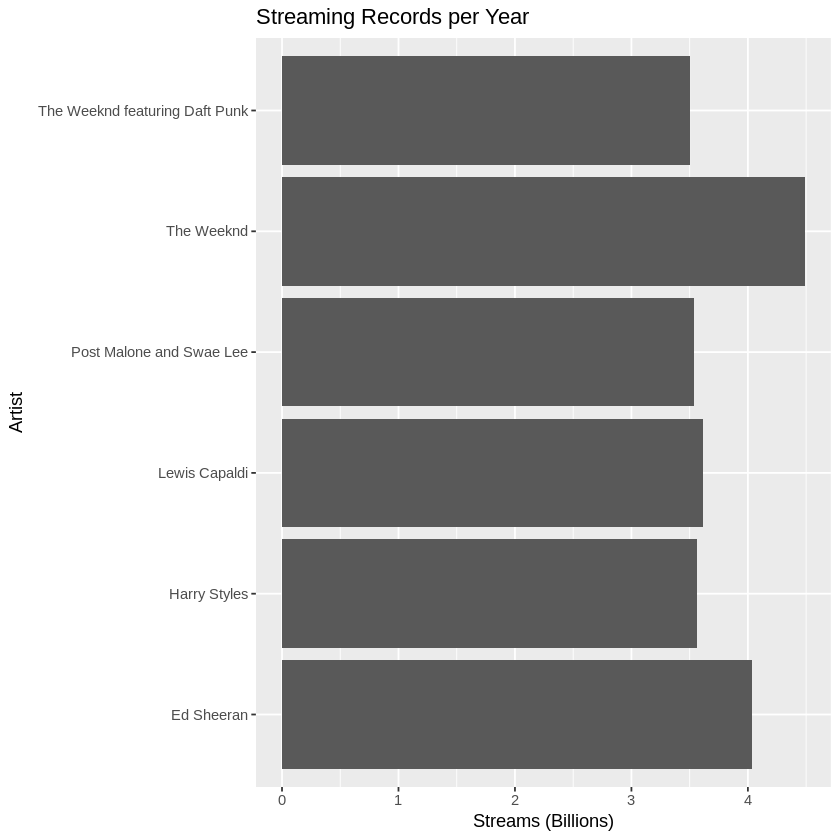

In [ ]:
# Einfache Visualisierung der Künstler mit >3,5 Milliarden Streams
ggplot(data = subset(spotify_table, streams_billions > 3.5), aes(x = streams_billions, y = artist_s)) +
  geom_col() +
  labs(title = "Streaming Records per Year",
       x = "Streams (Billions)",
       y = "Artist")

# B.3 Datendiebstähle öffentliche Verwaltung

In [ ]:
url_p <- rvest::read_html("https://en.wikipedia.org/wiki/List_of_data_breaches")
cyber_table_raw <- rvest::html_table(url_p, header = T) |> # extrahiert alle <table> Elemente von der Seite
  purrr::pluck(1) |> # Tabelle an n-ter Stelle (1)
  janitor::clean_names() # data cleaning der Tabellennamen
cyber_table_raw #Tabelle könnte hier schon ausgegeben werden

government,agency,year,records,organization_type,method,sources
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
United Kingdom,Transport for London,2024,"5000+ Passengers data including home addresses, bank account details, unconfirmed number of Staff data leaked too",Local Transport authority,hacked,[11]
50 companies and government institutions,Various,2022,"6,400,000",various,poor security,[12][13]
India,Indian Council of Medical Research,2023,"815,000,000+, including Aadhaar IDs, passport details, names, phone numbers, addresses",government,hacked by pwn0001,[14]
Australia,Australian Immigration Department,2015,G20 world leaders,government,accidentally published,[15]
Australia,Australian National University,2019,19 years of data,academic,hacked,[16]
"Sydney, Australia",Western Sydney University,2024,"7,500, including email accounts, SharePoint files, and the Microsoft Office 365 environment",academic,hacked,[17][18]
Bangladesh,"Office of the Registrar General, Birth & Death Registration",2023,"50,000,000+",government,data leak due to security vulnerabilities,[19]
United Kingdom,BBC,2024,"25,290 employee pension records, including name, date of birth, home address, national insurance number",public broadcasting,hacked,[20][21]
United Kingdom,British Library,2023,unknown,government,ransomware,[22]


In [ ]:
# Filter cyber_table_raw für year=2024
cyber_table_raw |>
  dplyr::filter(year == 2024)

government,agency,year,records,organization_type,method,sources
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
United Kingdom,Transport for London,2024,"5000+ Passengers data including home addresses, bank account details, unconfirmed number of Staff data leaked too",Local Transport authority,hacked,[11]
"Sydney, Australia",Western Sydney University,2024,"7,500, including email accounts, SharePoint files, and the Microsoft Office 365 environment",academic,hacked,[17][18]
United Kingdom,BBC,2024,"25,290 employee pension records, including name, date of birth, home address, national insurance number",public broadcasting,hacked,[20][21]
United Kingdom / Scotland,NHS Dumfries and Galloway,2024,still unknown,healthcare,cyber attack,[25][26]
England/Wales,England and Wales Cricket Board,2024,"43,299",government,unknown,[48]


**Ergebnis:** Fünf Cyberangriffe auf öffentliche Verwaltungen sind in diesem Jahr in der Quelle beschrieben worden. Davon befinden sich 4 in UK und ein Fall in Australien.

# B.4 Deutsche Staatsschulden (Bundesbank)

In [ ]:
url_p <- rvest::read_html("https://www.bundesbank.de/de/presse/pressenotizen/deutsche-staatsschulden-928466")
bundesbank_table_raw <- rvest::html_table(url_p, header = T) |> # extrahiert alle <table> Elemente von der Seite
  purrr::pluck(1) |> # Tabelle an n-ter Stelle (1)
  janitor::clean_names() # data cleaning der Tabellennamen
bundesbank_table_raw #Tabelle könnte hier schon ausgegeben werden

jahr,schuldenstand_mrd,in_percent_des_bip,schuldenstandanderung_mrd
<int>,<dbl>,<chr>,<chr>
2023,2.624,"63,7",+ 62
2022,2.562,"66,1",+ 66
2021,2.496,"69,0",+ 155
2020,2.341,"68,8",+ 271
2019,2.070,"59,6",- 14
2018,2.084,"61,9",- 47
2017,2.130,"65,2",- 31


In [ ]:
# Datenformatierung, Data Cleaning
bundesbank_table_raw$jahr <- as.integer(bundesbank_table_raw$jahr)
bundesbank_table_raw$in_percent_des_bip <- as.numeric(gsub(",", ".", bundesbank_table_raw$in_percent_des_bip))

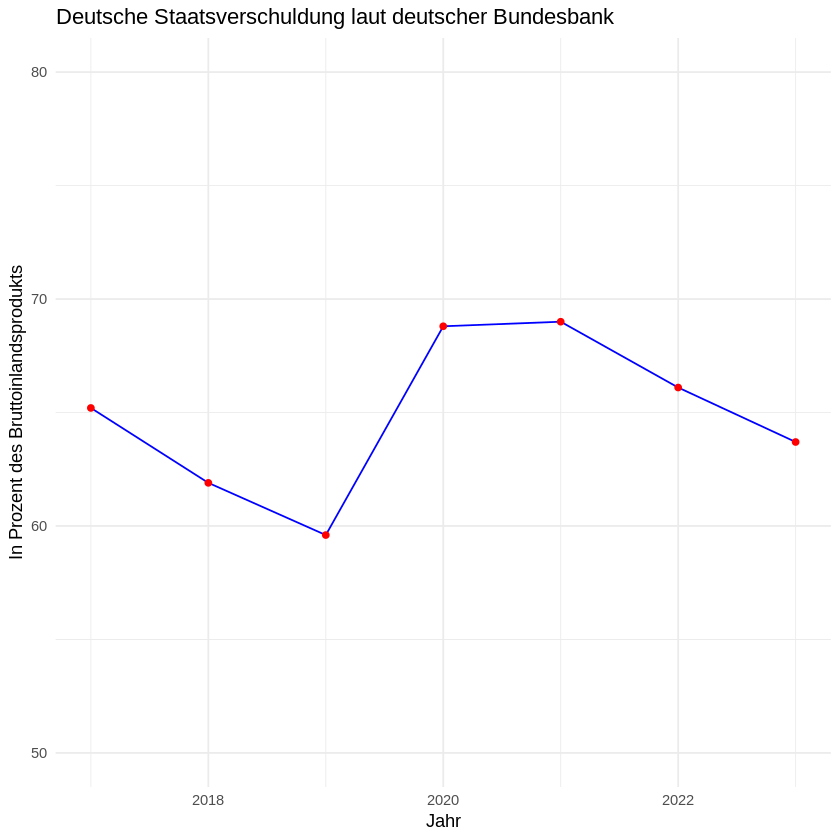

In [ ]:
# Einfache Visualisierung: Deutsche Staatsverschuldung gemessen am Prozentsatz des deutschen BIPs
ggplot(bundesbank_table_raw, aes(x = jahr, y = in_percent_des_bip)) +
  geom_line(color = "blue") +  # Farbe der Linie festlegen
  geom_point(color = "red") +  # Farbe der Punkte festlegen
  scale_y_continuous(limits = c(50, 80)) + # y-Achse Limits setzten: Verändern Sie diese nach Belieben.
  labs(title = "Deutsche Staatsverschuldung laut deutscher Bundesbank", # Beschriftung der Achsen
       x = "Jahr",
       y = "In Prozent des deutschen Bruttoinlandsprodukts (BIP)") +
  theme_minimal()

**Ergebnis:** Der Graph zeigt die Entwicklung der deutschen Staatsverschuldung gemessen am prozentualen Anteil des deutschen Bruttoinlandprodukts (BIP).

# (C) Applikation Programming Interfaces (API)

APIs, auch Anwendungsprogrammierschnittstellen genannt, ermöglichen es Softwareanwendungen, miteinander zu kommunizieren und Daten auszutauschen. Im Kontext des Webs beziehen wir uns gewöhnlich auf RESTful Web APIs, die auf HTTP-Anfragen mit spezifischen Parametern reagieren und Daten zurücksenden.

Um Daten von einer API zu beziehen, empfehlen wir Ihnen, folgenden Arbeitsablauf zu befolgen:

1. **Lesen Sie die Dokumentation der API!**
   - Dies ist entscheidend, um zu verstehen, wie die API funktioniert und welche Ressourcen verfügbar sind.

2. **Ermitteln Sie die Basis-URL**
   - Dies ist die Grundadresse der API, an die Anfragen gesendet werden.

3. **Finden Sie die Parameter heraus, die sich auf die für Sie interessanten Ressourcen beziehen**
   - Diese Parameter spezifizieren die Details Ihrer Anfrage, z.B. spezifische Datensätze oder die Anzahl der Ergebnisse, die zurückgegeben werden sollen.

4. **Erstellen Sie eine Abfrage-URL aus der Basis-URL und den Abfrageparametern**
   - Kombinieren Sie die Basis-URL mit den notwendigen Parametern, um die vollständige URL zu erstellen, die Ihre spezifische Anfrage darstellt.

5. **Führen Sie die `GET`-Funktion auf der Abfrage-URL aus**
   - Dies sendet die Anfrage an die API und erhält die Antwort.

6. **Abhängig von der Kodierung (üblicherweise ist dies JSON), müssen Sie:**
   - Das Ergebnis mit der `content`-Funktion parsen.
   - Entweder `jsonlite` für JSON oder `xml2` für XML verwenden, um die erhaltenen Dateien zu parsen.

Indem Sie diesen Workflow befolgen, können Sie effektiv und effizient Daten von APIs beziehen, die für Ihre Projekte oder Analysen relevant sind.

In [ ]:
library(httr)
library(jsonlite)
library(xml2)
library(glue)

In [ ]:
baseurl <- "https://swapi.dev/api/"

query <- 'films'

httr::GET(paste0(baseurl, query)) |> # Make API call
  httr::content(as = 'text') |> # extract content as text
  jsonlite::fromJSON() |> # convert JSON data into R object (nested list)
  purrr::pluck(4) # extract from index inside nested list (4th place corresponding to "results" in the payload)

No encoding supplied: defaulting to UTF-8.



,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species,created,edited,url
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>,<list>,<list>,<chr>,<chr>,<chr>
1,A New Hope,4,"It is a period of civil war. Rebel spaceships, striking from a hidden base, have won their first victory against the evil Galactic Empire. During the battle, Rebel spies managed to steal secret plans to the Empire's ultimate weapon, the DEATH STAR, an armored space station with enough power to destroy an entire planet. Pursued by the Empire's sinister agents, Princess Leia races home aboard her starship, custodian of the stolen plans that can save her people and restore freedom to the galaxy....",George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,"https://swapi.dev/api/people/1/ , https://swapi.dev/api/people/2/ , https://swapi.dev/api/people/3/ , https://swapi.dev/api/people/4/ , https://swapi.dev/api/people/5/ , https://swapi.dev/api/people/6/ , https://swapi.dev/api/people/7/ , https://swapi.dev/api/people/8/ , https://swapi.dev/api/people/9/ , https://swapi.dev/api/people/10/, https://swapi.dev/api/people/12/, https://swapi.dev/api/people/13/, https://swapi.dev/api/people/14/, https://swapi.dev/api/people/15/, https://swapi.dev/api/people/16/, https://swapi.dev/api/people/18/, https://swapi.dev/api/people/19/, https://swapi.dev/api/people/81/","https://swapi.dev/api/planets/1/, https://swapi.dev/api/planets/2/, https://swapi.dev/api/planets/3/","https://swapi.dev/api/starships/2/ , https://swapi.dev/api/starships/3/ , https://swapi.dev/api/starships/5/ , https://swapi.dev/api/starships/9/ , https://swapi.dev/api/starships/10/, https://swapi.dev/api/starships/11/, https://swapi.dev/api/starships/12/, https://swapi.dev/api/starships/13/","https://swapi.dev/api/vehicles/4/, https://swapi.dev/api/vehicles/6/, https://swapi.dev/api/vehicles/7/, https://swapi.dev/api/vehicles/8/","https://swapi.dev/api/species/1/, https://swapi.dev/api/species/2/, https://swapi.dev/api/species/3/, https://swapi.dev/api/species/4/, https://swapi.dev/api/species/5/",2014-12-10T14:23:31.880000Z,2014-12-20T19:49:45.256000Z,https://swapi.dev/api/films/1/
2,The Empire Strikes Back,5,"It is a dark time for the Rebellion. Although the Death Star has been destroyed, Imperial troops have driven the Rebel forces from their hidden base and pursued them across the galaxy. Evading the dreaded Imperial Starfleet, a group of freedom fighters led by Luke Skywalker has established a new secret base on the remote ice world of Hoth. The evil lord Darth Vader, obsessed with finding young Skywalker, has dispatched thousands of remote probes into the far reaches of space....",Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,"https://swapi.dev/api/people/1/ , https://swapi.dev/api/people/2/ , https://swapi.dev/api/people/3/ , https://swapi.dev/api/people/4/ , https://swapi.dev/api/people/5/ , https://swapi.dev/api/people/10/, https://swapi.dev/api/people/13/, https://swapi.dev/api/people/14/, https://swapi.dev/api/people/18/, https://swapi.dev/api/people/20/, https://swapi.dev/api/people/21/, https://swapi.dev/api/people/22/, https://swapi.dev/api/people/23/, https://swapi.dev/api/people/24/, https://swapi.dev/api/people/25/, https://swapi.dev/api/people/26/","https://swapi.dev/api/planets/4/ , https://swapi.dev/api/planets/5/ , https://swapi.dev/api/planets/6/ , https://swapi.dev/api/planets/27/","https://swapi.dev/api/starships/3/ , https://swapi.dev/api/starships/10/, https://swapi.dev/api/starships/11/, https://swapi.dev/api/starships/12/, https://swapi.dev/api/starships/15/, https://swapi.dev/api/starships/17/, https://swapi.dev/api/starships/21/, https://swapi.dev/api/starships/22/, https://swapi.dev/api/starships/23/","https://swapi.dev/api/vehicles/8/ , https://swapi.dev/api/vehicles/14/, https://swapi.dev/api/vehicles/16/, https://swapi.dev/api/vehicles/18/, https://swapi.dev/api/vehicles/19/, https://swapi.dev/api/vehicles/

In [ ]:
query <- 'people/?search=skywalker'

httr::GET(paste0(baseurl, query)) |> # Make API call
  httr::content(as = 'text') |> # extract content as text
  jsonlite::fromJSON() |> # convert JSON data into R object (nested list)
  purrr::pluck(4)  # extract from index inside nested list (4th place corresponding to "results" in the payload)

No encoding supplied: defaulting to UTF-8.



,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<list>,<list>,<list>,<chr>,<chr>,<chr>
1,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"https://swapi.dev/api/films/1/, https://swapi.dev/api/films/2/, https://swapi.dev/api/films/3/, https://swapi.dev/api/films/6/",NULL,"https://swapi.dev/api/vehicles/14/, https://swapi.dev/api/vehicles/30/","https://swapi.dev/api/starships/12/, https://swapi.dev/api/starships/22/",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
2,Anakin Skywalker,188,84,blond,fair,blue,41.9BBY,male,https://swapi.dev/api/planets/1/,"https://swapi.dev/api/films/4/, https://swapi.dev/api/films/5/, https://swapi.dev/api/films/6/",NULL,"https://swapi.dev/api/vehicles/44/, https://swapi.dev/api/vehicles/46/","https://swapi.dev/api/starships/39/, https://swapi.dev/api/starships/59/, https://swapi.dev/api/starships/65/",2014-12-10T16:20:44.310000Z,2014-12-20T21:17:50.327000Z,https://swapi.dev/api/people/11/
3,Shmi Skywalker,163,unknown,black,fair,brown,72BBY,female,https://swapi.dev/api/planets/1/,"https://swapi.dev/api/films/4/, https://swapi.dev/api/films/5/",NULL,,,2014-12-19T17:57:41.191000Z,2014-12-20T21:17:50.401000Z,https://swapi.dev/api/people/43/


**Referenz:** Introduction to Data Science, Winter Semester 2024, Prof. Dr. Simon Munzert, Hertie School of Governance. https://github.com/intro-to-data-science-24/labs
https://rawcdn.githack.com/intro-to-data-science-24/labs/ef7c1681527746897d8c80f8b703e8109264bc05/session-06-web-scraping/6-web-scraping.html